In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing data

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns =boston.feature_names )
data['PRICE'] = boston.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.shape

(506, 14)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There are no null values in the dataset

# Heatmap of datset

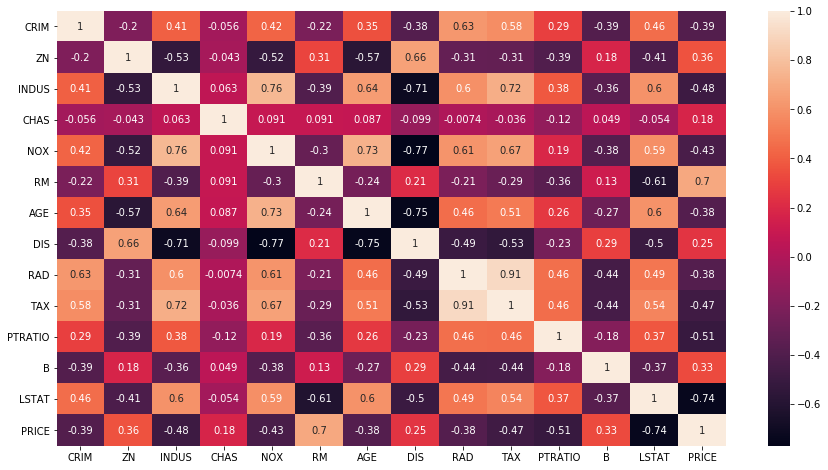

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

There is high multicolinarity in the data

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [19]:
X  = data.drop('PRICE',axis=1)
y = data.PRICE

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.2)

# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scaling the data

In [22]:
sc = StandardScaler()
X_train_s = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_s = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

# Applying PCA

In [24]:
pca = PCA()
pca.fit(X_train_s,y_train)
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),index=np.arange(1,14),columns=['Cumulative Explained Variance'])

,Cumulative Explained Variance
1,0.479985
2,0.596910
3,0.690851
4,0.755085
5,0.816625
6,0.863973
7,0.901901
8,0.931742
9,0.952017
10,0.968726


9 features explain 95% of variation in the data

In [25]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

# Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr = RandomForestRegressor()
rfr.fit(X_train_pca,y_train)
print('Training Score',rfr.score(X_train_pca,y_train))
print('Testing Score',rfr.score(X_test_pca,y_test))

Training Score 0.9654535784655749
Testing Score 0.8092378025226672


# Hyper Parameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf = RandomForestRegressor(random_state=20)
params = {'n_estimators':np.arange(10,200,10),'max_depth':np.arange(10,20,2),'max_features':[2,4,6,8]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train_pca,y_train)
grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 40}

In [55]:
rf = RandomForestRegressor(random_state=20,max_depth=14,max_features=7,n_estimators=100)
rf.fit(X_train_pca,y_train)
print('Training Score',rf.score(X_train_pca,y_train))
print('Testing Score',rf.score(X_test_pca,y_test))

Training Score 0.9688922392167012
Testing Score 0.8197223356203103
